# Project : A study of restaurant foods at Bangalore, based on online food delivery business data - Zomato.

## Project Objectives :-

1. Find best food and restaurants in Bangalore. 
2. Find popular cuisines to identify business opportunity in restaurant field.
3. Find potential customer base and the number of existing restaurants in each location.
4. Find customer preference of international foods over domestic traditional foods.
5. Find buying trend of junk foods over years - Increasing or decreasing trend.# Note: order date and time field is missing, so trend analysis not possible as of now but we will check popularity of junk food instead. 
6. Find price range of top 10 popular items across restaurants.
7. Find unique food items and its restaurant.
8. Find top restaurant chains in Bangalore. 
9. Find most demanding meal time - Breakfast/Lunch/Dinner.# Note: order date and time field is missing in the dataset, so we need to retrieve from database. mealtime wise demand of online order preference checking will do later.
10. Find the business growth of Zomato online food delivery business over the period. # Note: When we explored the dataset, the date field not available. so we have to fetch additional fields from database.
 

![](http://pcdblog.com/wp-content/uploads/2018/09/myplate.png)

### Load libraries and Understand dataset

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter


In [2]:
df=pd.read_csv('zomato.csv')

In [3]:
df.head()  # Shows first 5 rows of dataframe

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.dtypes # Check the data types of all columns


url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [5]:
df.shape  # Check number of rows and columns

(51717, 17)

In [6]:
df.columns # Dataframe columns as index


Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

### Cleaning Dataset

In [7]:
df.isnull().sum()  # Check for missing values


url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [8]:
df['listed_in(city)'].unique() # checking unique values of each columns and drop if not relevant

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [9]:
# Drop the 'url' column
df = df.drop('url', axis=1)

In [10]:
# Drop the 'book_table' column
df = df.drop('book_table', axis=1)

In [11]:
# Drop the 'phone' column
df = df.drop('phone', axis=1)

In [12]:
# Rename columns for better understanding about data
df.rename(columns={'listed_in(type)': 'Restaurant Category', 'listed_in(city)': 'Restaurant Area'}, inplace=True)

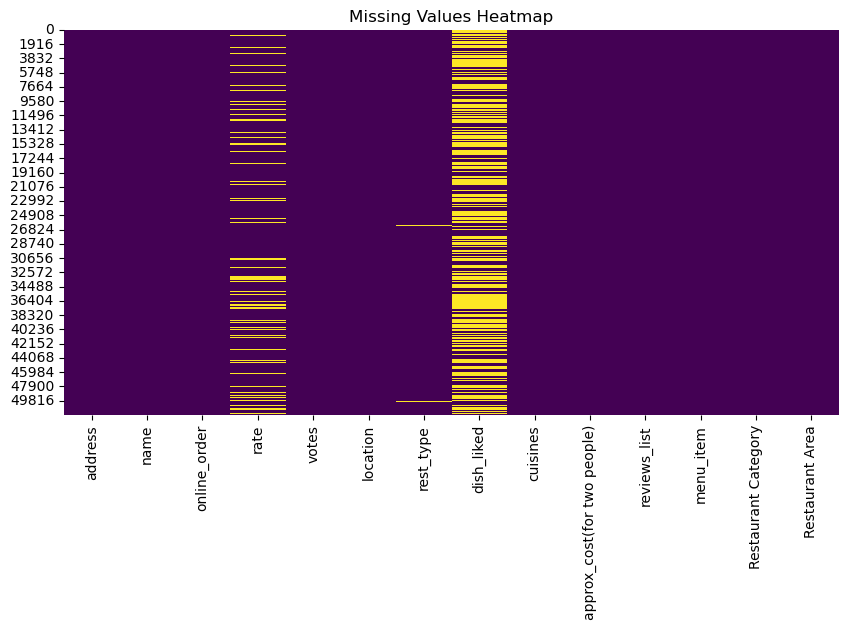

In [13]:
# Visualize missing values using a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

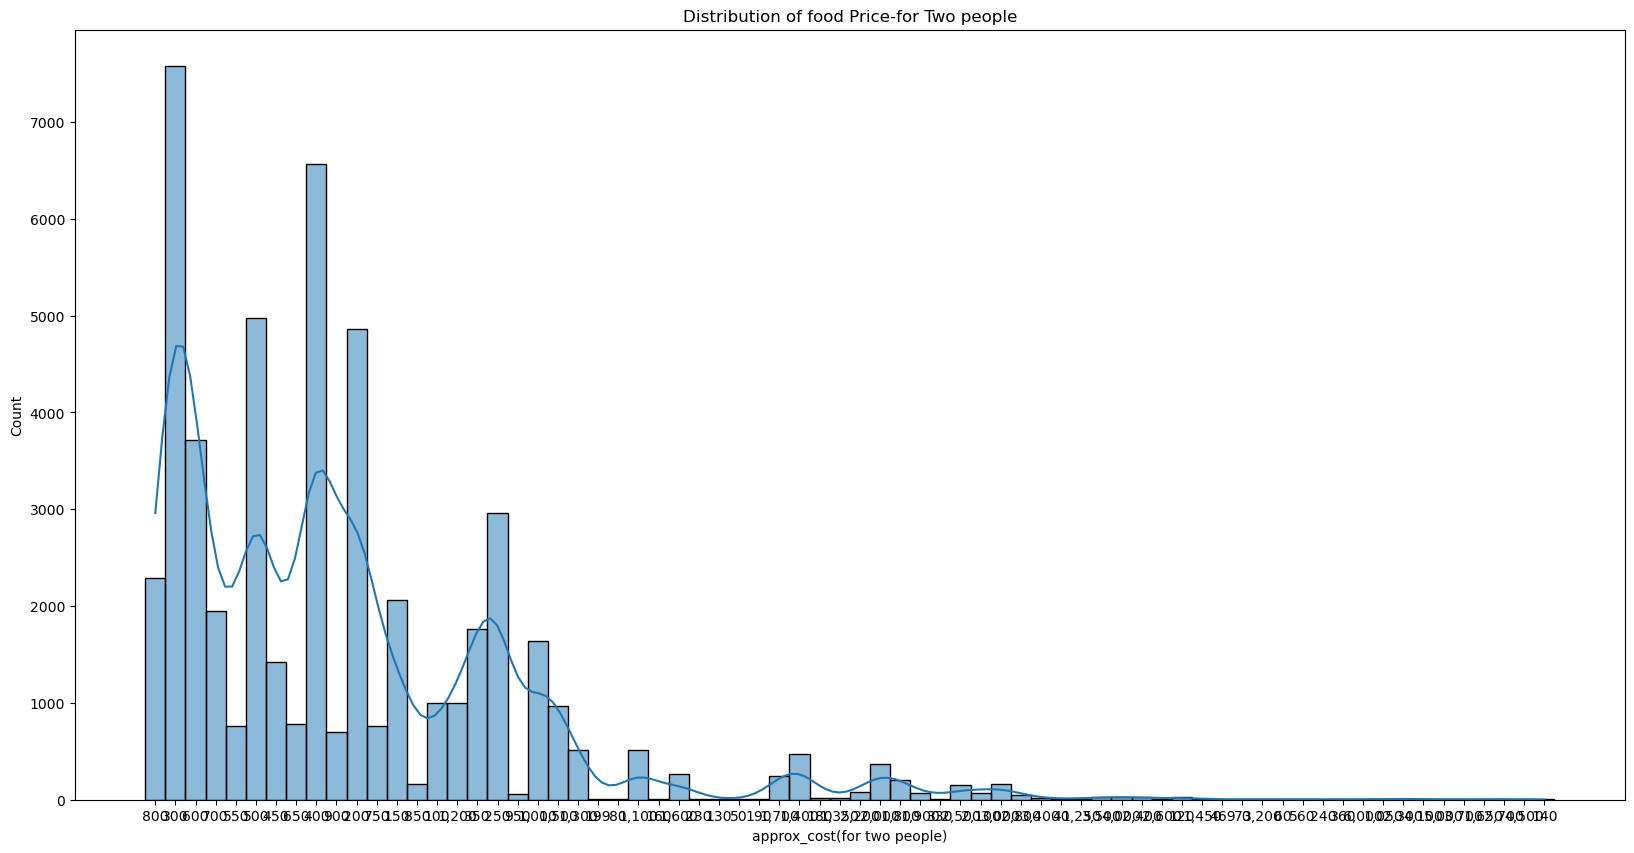

In [14]:
# Distribution of 'Price' column
plt.figure(figsize=(20, 10))
sns.histplot(df['approx_cost(for two people)'], bins=15, kde=True)
plt.title("Distribution of food Price-for Two people")
plt.xlabel("approx_cost(for two people)")
plt.show()

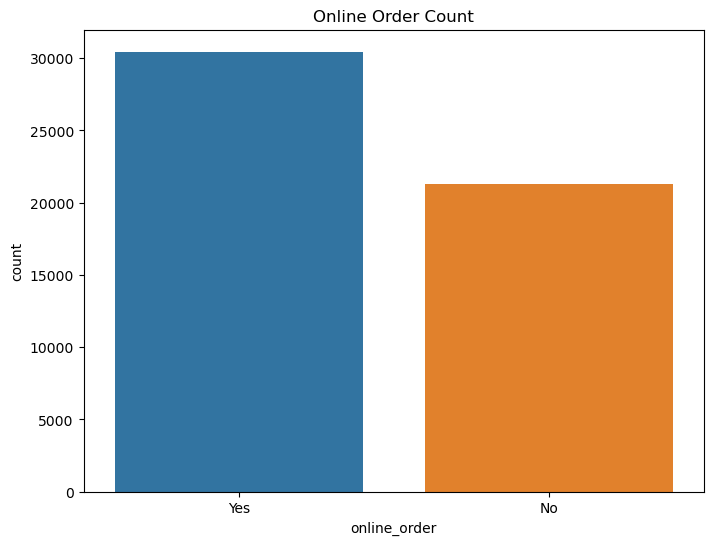

In [15]:
# Countplot for 'online_order'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='online_order')
plt.title("Online Order Count")
plt.show()

In [16]:
df['approx_cost(for two people)'].dtype #check data type

dtype('O')

In [17]:
df['approx_cost(for two people)'].unique() # check unique values

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [18]:
# Converting into float
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',', '', regex=True).astype(float)

In [19]:
df['approx_cost(for two people)'].dtype

dtype('float64')

In [20]:
df['votes'].dtype #check data typevotes


dtype('int64')

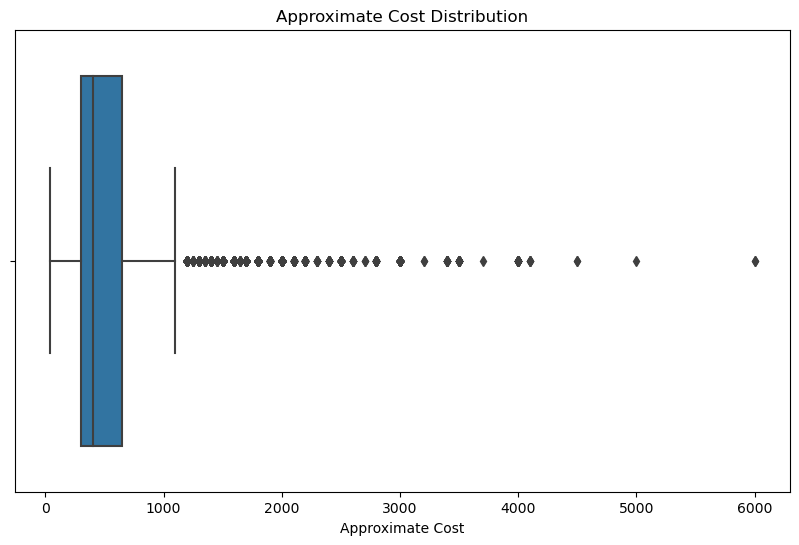

In [21]:
# Boxplot for 'approx_cost(for two people)'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='approx_cost(for two people)')
plt.title("Approximate Cost Distribution")
plt.xlabel("Approximate Cost")
plt.show()

In [22]:
df.head()

,address,name,online_order,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,Restaurant Category,Restaurant Area
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### Project Objective oriented Data Analysis and Visualisation.

##### 1. Best food & Best resturant

In [23]:
# Convert 'rate' column to a numeric format for sorting
df['rate'] = df['rate'].str.extract('(\d+\.\d+)').astype(float)

# Find the row with the highest rating
best_food_row = df[df['rate'] == df['rate'].max()]

# Extract and print the best food from the row
best_food = best_food_row['dish_liked'].values[0]
best_rating = best_food_row['rate'].values[0]

print("Best Food:")
print(best_food)
print("Rating:", best_rating)

Best Food:
Cocktails, Dahi Kebab, Rajma Chawal, Butter Chicken, Craft Beer, Chicken Dumplings, Teriyaki Fish
Rating: 4.9


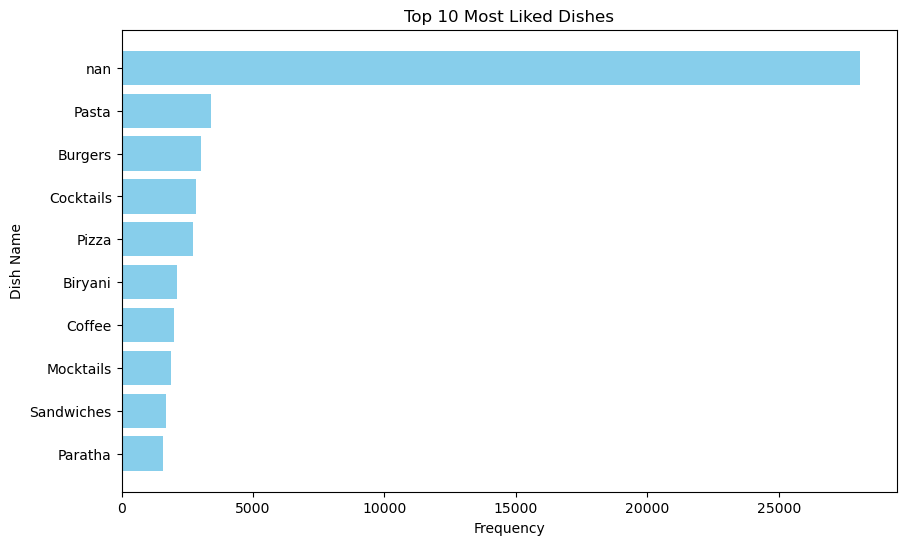

In [24]:
# Convert "dish_liked" values to strings and remove any NaN values
dish_liked_strings = df["dish_liked"].astype(str).apply(lambda x: x.split(', '))

# Flatten the list of dish names
all_dishes = [dish for dishes in dish_liked_strings for dish in dishes]

# Count the frequency of dish liked
dish_liked_counts = Counter(all_dishes)

# Get the top 10 most-liked dishes
top_10_dishes = dict(dish_liked_counts.most_common(10))

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(list(top_10_dishes.keys()), list(top_10_dishes.values()), color='skyblue')
plt.title('Top 10 Most Liked Dishes')
plt.xlabel('Frequency')
plt.ylabel('Dish Name')
plt.gca().invert_yaxis()
plt.show()


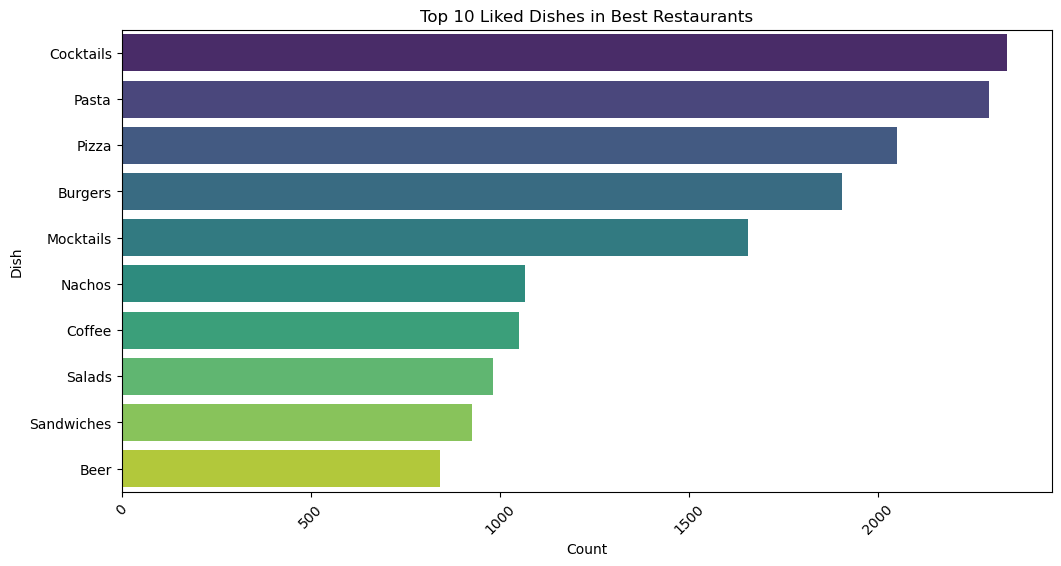

In [25]:
best_restaurants = df[df['rate'] >= 4.0]
best_dishes = best_restaurants['dish_liked'].str.split(', ').explode()
best_dishes_counts = best_dishes.value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=best_dishes_counts.index, x=best_dishes_counts.values, palette='viridis')
plt.title("Top 10 Liked Dishes in Best Restaurants")
plt.xlabel("Count")
plt.ylabel("Dish")
plt.xticks(rotation=45)
plt.show()

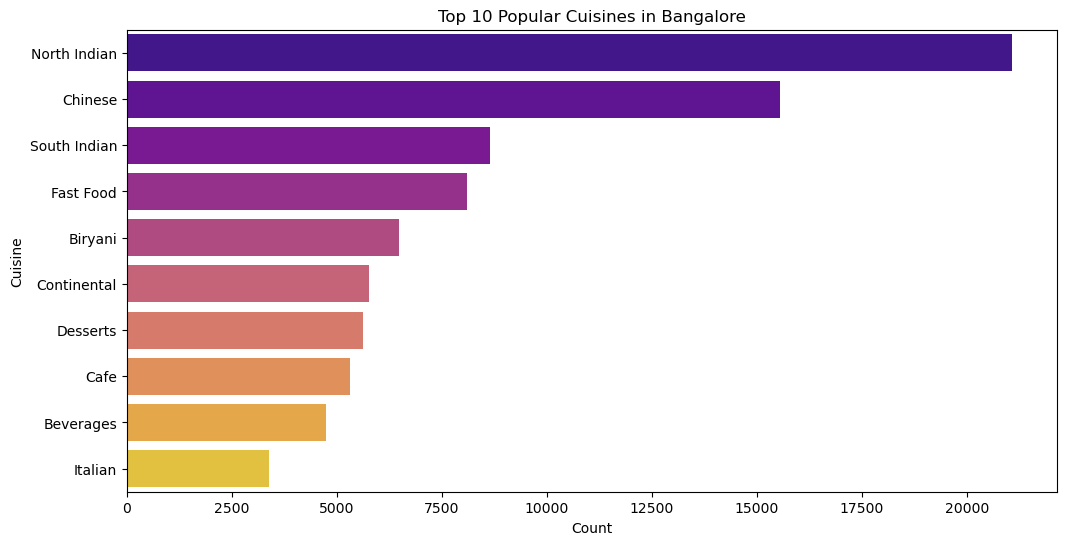

In [26]:
# popular cuisines
popular_cuisines = df['cuisines'].str.split(', ').explode()
popular_cuisines_counts = popular_cuisines.value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=popular_cuisines_counts.index, x=popular_cuisines_counts.values, palette='plasma')
plt.title("Top 10 Popular Cuisines in Bangalore")
plt.xlabel("Count")
plt.ylabel("Cuisine")
plt.show()

##### Objective 2: popular cuisines

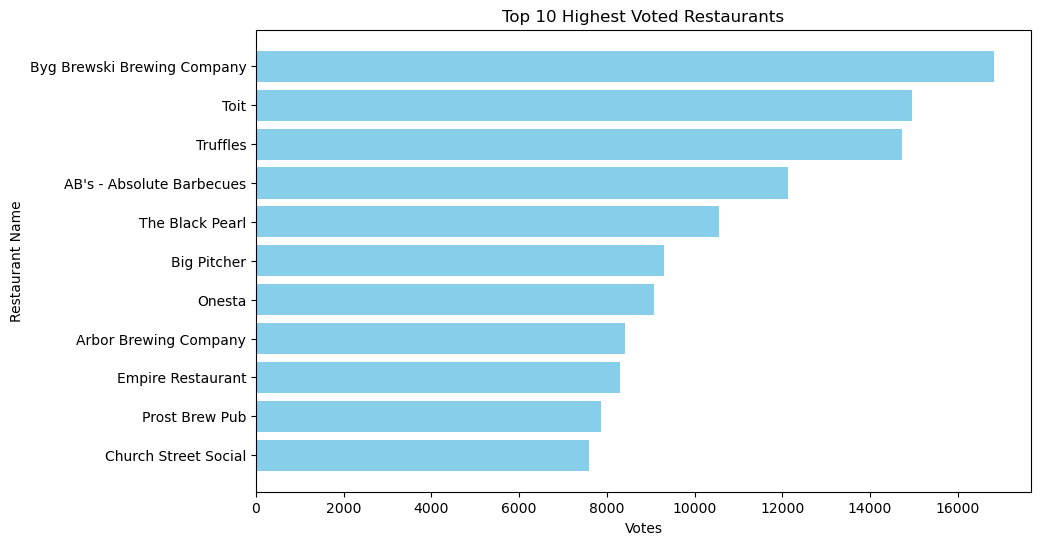

In [27]:
# Top 10 Highest-Voted Restaurants
# Sort the data by votes to find the top 10 highest-voted restaurants
top_10_highest_voted = df.nlargest(100,'votes')

# Create a bar chart for the top 10 highest-voted restaurants
plt.figure(figsize=(10, 6))
plt.barh(top_10_highest_voted['name'], top_10_highest_voted['votes'], color='skyblue')
plt.title('Top 10 Highest Voted Restaurants')
plt.xlabel('Votes')
plt.ylabel('Restaurant Name')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest votes at the top
plt.show()


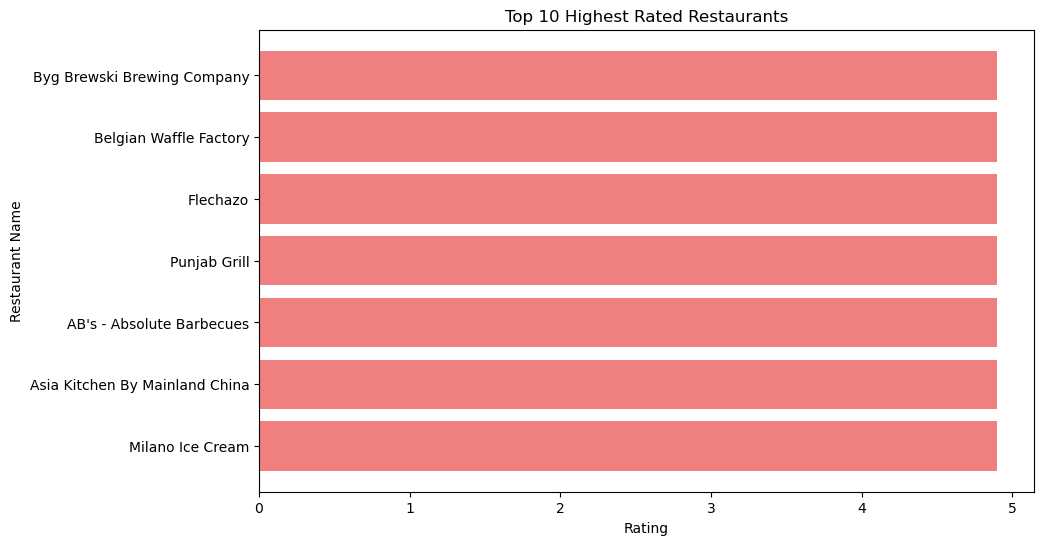

In [28]:
# Sort the data by rate to find the top 10 highest-rated restaurants
top_10_highest_rated = df.nlargest(25, 'rate')

# Create a bar chart for the top 10 highest-rated restaurants
plt.figure(figsize=(10, 6))
plt.barh(top_10_highest_rated['name'], top_10_highest_rated['rate'], color='lightcoral')
plt.title('Top 10 Highest Rated Restaurants')
plt.xlabel('Rating')
plt.ylabel('Restaurant Name')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest rating at the top
plt.show()

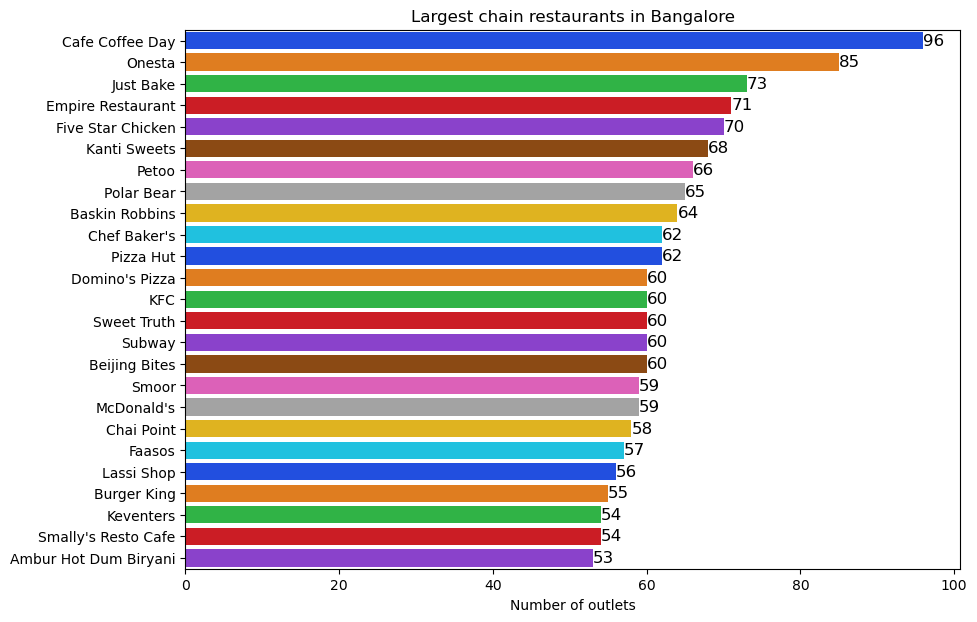

In [29]:
# 8. Most popular resturant chains in the dataset.

# Find top 25 chain restaurants by the number of outlets
chains = df['name'].value_counts()[:25]

# Create the bar plot using Seaborn
plt.figure(figsize=(10, 7))
sns.barplot(x=chains, y=chains.index, palette='bright')

# Add data labels to the bars
for i, v in enumerate(chains):
    plt.text(v, i, str(v), va='center', fontsize=12, color='black')

plt.title("Largest chain restaurants in Bangalore")
plt.xlabel("Number of outlets")

# Show the plot
plt.show()

##### Objective 3: Find potential customer base and number of restaurants in each location

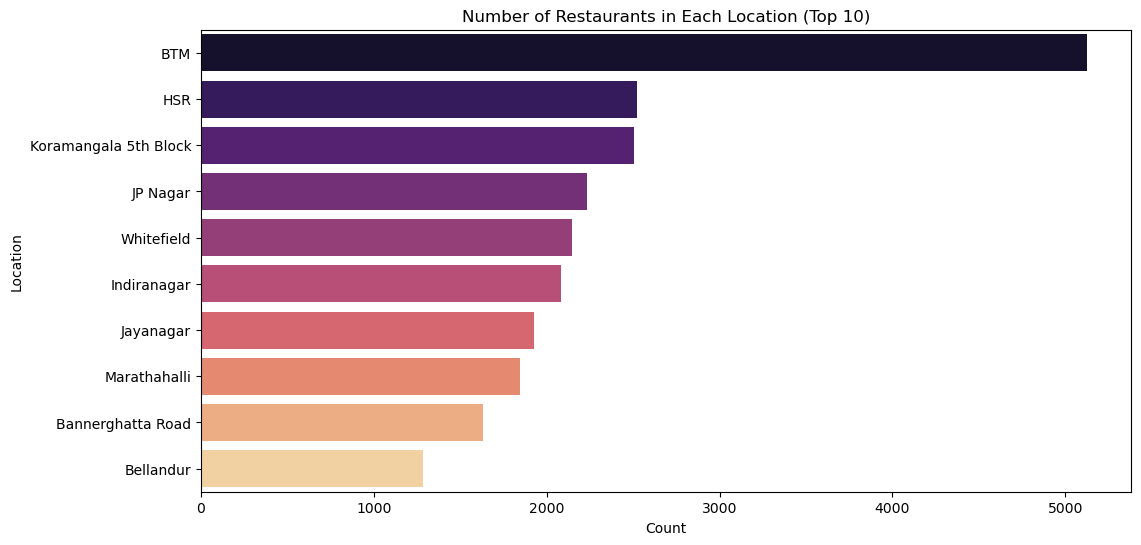

In [30]:
# Customer locaton not provided specifically but we can assume customer opted nearest resturants for online order.
# Get the counts of restaurants in each location
location_restaurant_counts = df['location'].value_counts()

# Select the top 10 locations with the most restaurants
top_10_locations = location_restaurant_counts.head(10)

# Create a bar plot for the top 10 locations
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_locations.values, y=top_10_locations.index, palette='magma')
plt.title("Number of Restaurants in Each Location (Top 10)")
plt.xlabel("Count")
plt.ylabel("Location")
plt.show()


# Objective 4: Find customer preference for international vs. traditional foods

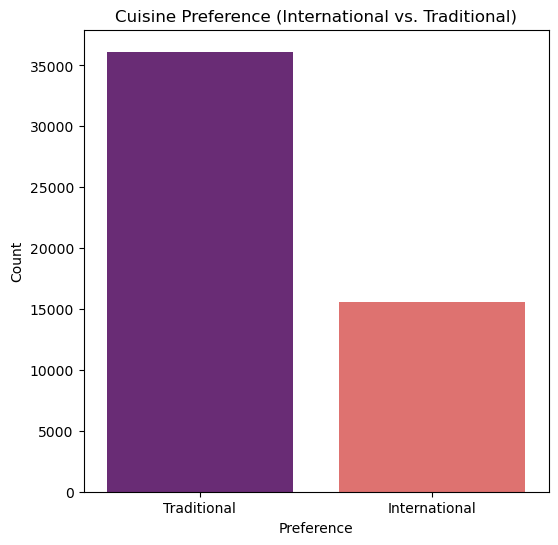

In [31]:
# Assuming 'cuisines' contains information about international vs. traditional cuisines
# Filter out rows with missing or invalid 'cuisines' values
df = df.dropna(subset=['cuisines'])

# Define a function to determine cuisine preference
def determine_cuisine_preference(cuisines):
    if 'Chinese' in cuisines:
        return 'International'
    else:
        return 'Traditional'

# Apply the function to create a new 'cuisine_preference' column
df.loc[:, 'cuisine_preference'] = df['cuisines'].apply(determine_cuisine_preference)

# Count the cuisine preferences
cuisine_preference_counts = df['cuisine_preference'].value_counts()

# Create a bar plot to visualize cuisine preferences
plt.figure(figsize=(6, 6))
sns.barplot(x=cuisine_preference_counts.index, y=cuisine_preference_counts.values, palette='magma')
plt.title("Cuisine Preference (International vs. Traditional)")
plt.xlabel("Preference")
plt.ylabel("Count")
plt.show()

### Objective 5 : Find buying trend of junk foods over years - Increasing or decreasing trend.# Note: order date and time field is missing, so trend analysis not possible as of now but we will check popularity of junk food instead. 

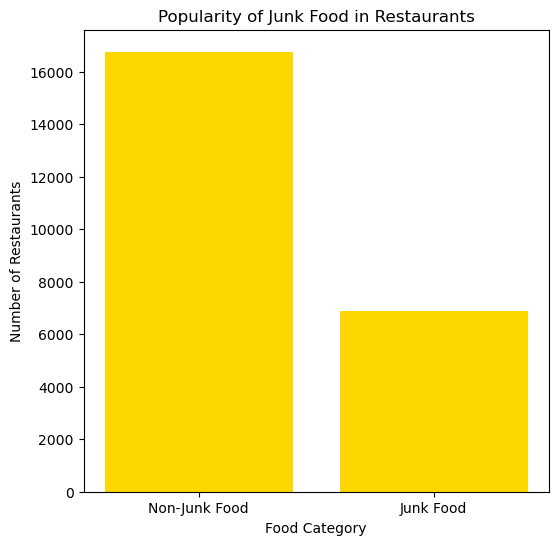

In [32]:
# Filter out rows with missing or invalid 'dish_liked' values
df = df.dropna(subset=['dish_liked'])

# Function to check if a dish is considered a "junk food"
def is_junk_food(dish):
    junk_food_keywords = ['pizza', 'burger', 'fries', 'nuggets', 'hot dog', 'fried chicken']
    for keyword in junk_food_keywords:
        if keyword in dish.lower():
            return True
    return False

# Create a new column 'is_junk_food' to identify junk food items
df.loc[:, 'is_junk_food'] = df['dish_liked'].apply(lambda x: any(is_junk_food(dish) for dish in x.split(', ')))

# Count the number of restaurants offering junk food
junk_food_counts = df['is_junk_food'].value_counts()

# Create a bar plot to visualize the popularity of junk food
plt.figure(figsize=(6, 6))
plt.bar(junk_food_counts.index, junk_food_counts.values, color='gold')
plt.xticks([0, 1], ['Non-Junk Food', 'Junk Food'])
plt.title("Popularity of Junk Food in Restaurants")
plt.xlabel("Food Category")
plt.ylabel("Number of Restaurants")
plt.show()


### Objective 6: Find approx_cost(for two people) in popular restaurants

In [33]:
# Define the criteria for popular restaurants (e.g., high rating or high number of votes)
# You can adjust these criteria based on your preferences
min_rating = 4.0  # Minimum rating for a restaurant to be considered popular
min_votes = 500   # Minimum number of votes for a restaurant to be considered popular

# Filter popular restaurants based on the criteria
popular_restaurants = df[(df['rate'] >= min_rating) & (df['votes'] >= min_votes)]

# Calculate the average approximate cost for two people in popular restaurants
average_cost_for_two = popular_restaurants['approx_cost(for two people)'].mean()

print(f"Average Approximate Cost for Two People in Popular Restaurants: {average_cost_for_two:.2f} INR")

Average Approximate Cost for Two People in Popular Restaurants: 1085.54 INR


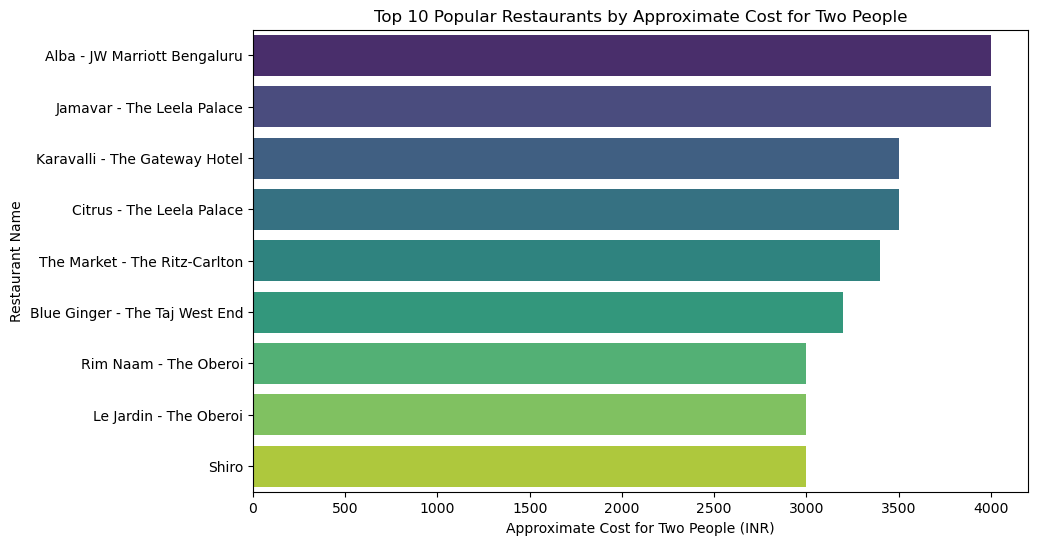

In [34]:
# Filter popular restaurants based on the criteria
popular_restaurants = df[(df['rate'] >= min_rating) & (df['votes'] >= min_votes)]

# Sort the popular restaurants by approximate cost for two people in descending order
top_10_popular_restaurants = popular_restaurants.nlargest(30, 'approx_cost(for two people)')

# Create a bar plot to visualize the top 10 popular restaurants
plt.figure(figsize=(10, 6))
sns.barplot(x='approx_cost(for two people)', y='name', data=top_10_popular_restaurants, palette='viridis')
plt.title("Top 10 Popular Restaurants by Approximate Cost for Two People")
plt.xlabel("Approximate Cost for Two People (INR)")
plt.ylabel("Restaurant Name")
plt.show()


#### Objective 7: Find unique food items and their restaurants

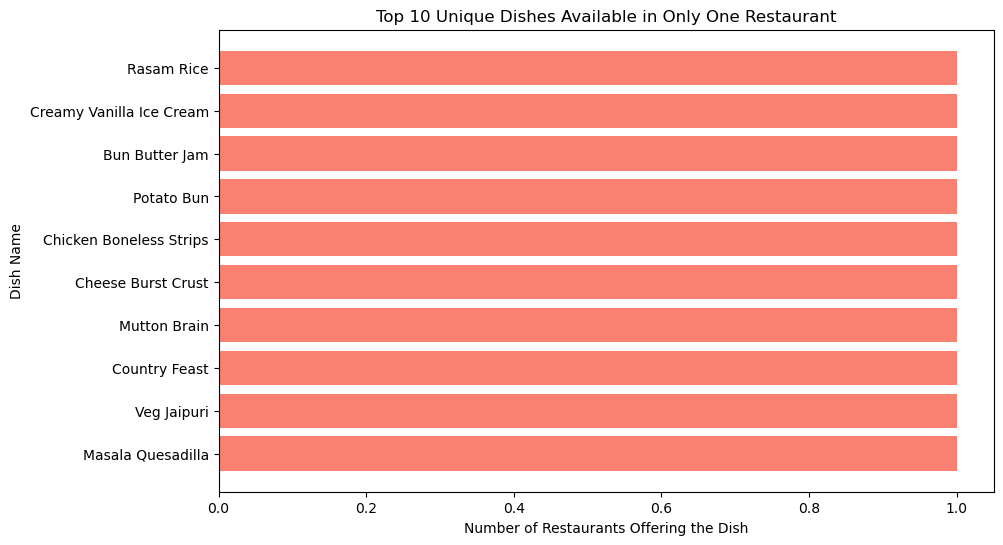

In [35]:
# Create a dictionary to store unique dishes and their respective restaurants
unique_dishes = {}

# Iterate through the dataset to find unique dishes
for index, row in df.iterrows():
    dishes = row['dish_liked'].split(', ')
    restaurant_name = row['name']
    for dish in dishes:
        dish = dish.strip()
        if dish not in unique_dishes:
            unique_dishes[dish] = [restaurant_name]
        else:
            unique_dishes[dish].append(restaurant_name)

# Filter unique dishes that are available in only one restaurant
unique_dishes = {dish: restaurants for dish, restaurants in unique_dishes.items() if len(restaurants) == 1}

# Sort unique dishes by the number of restaurants offering them (ascending order)
sorted_unique_dishes = sorted(unique_dishes.items(), key=lambda x: len(x[1]))

# Extract the top 10 unique dishes with the fewest restaurants offering them
top_10_unique_dishes = sorted_unique_dishes[:10]

# Create a bar plot to visualize the top 10 unique dishes
dishes, restaurants = zip(*top_10_unique_dishes)
plt.figure(figsize=(10, 6))
plt.barh(dishes, [len(restaurant) for restaurant in restaurants], color='salmon')
plt.title("Top 10 Unique Dishes Available in Only One Restaurant")
plt.xlabel("Number of Restaurants Offering the Dish")
plt.ylabel("Dish Name")
plt.show()


### Objective 8: Find top restaurant chains

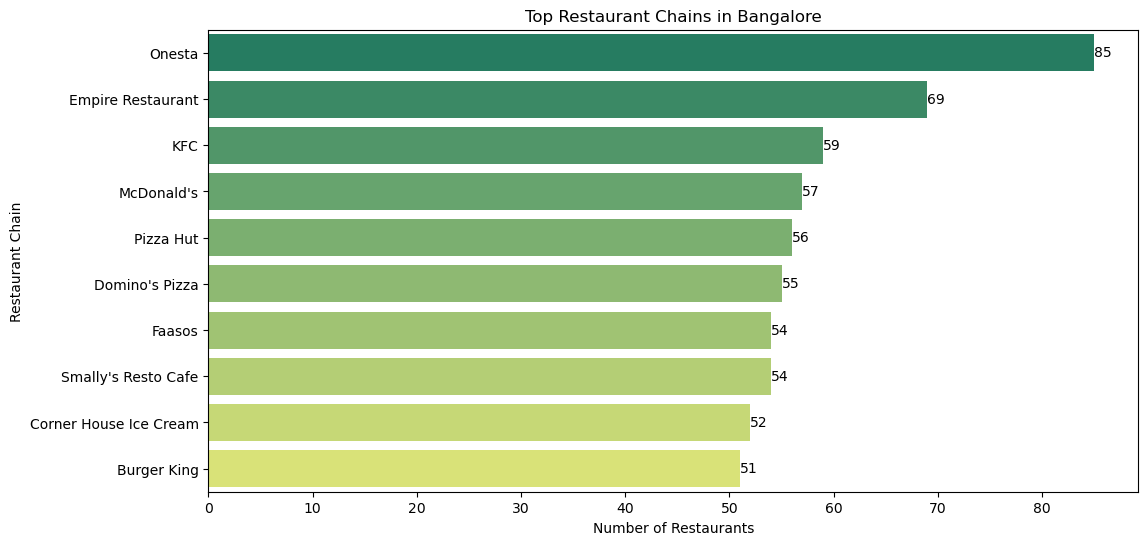

In [36]:
# Extract the restaurant chains and count the number of branches for each chain
restaurant_chains = df['name'].str.split('-', expand=True)[0].value_counts().head(10)

# Create a bar plot to visualize the popular restaurant chains
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=restaurant_chains.values, y=restaurant_chains.index, palette='summer')

# Add value labels above the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center')

plt.title("Top Restaurant Chains in Bangalore")
plt.xlabel("Number of Restaurants")
plt.ylabel("Restaurant Chain")
plt.show()

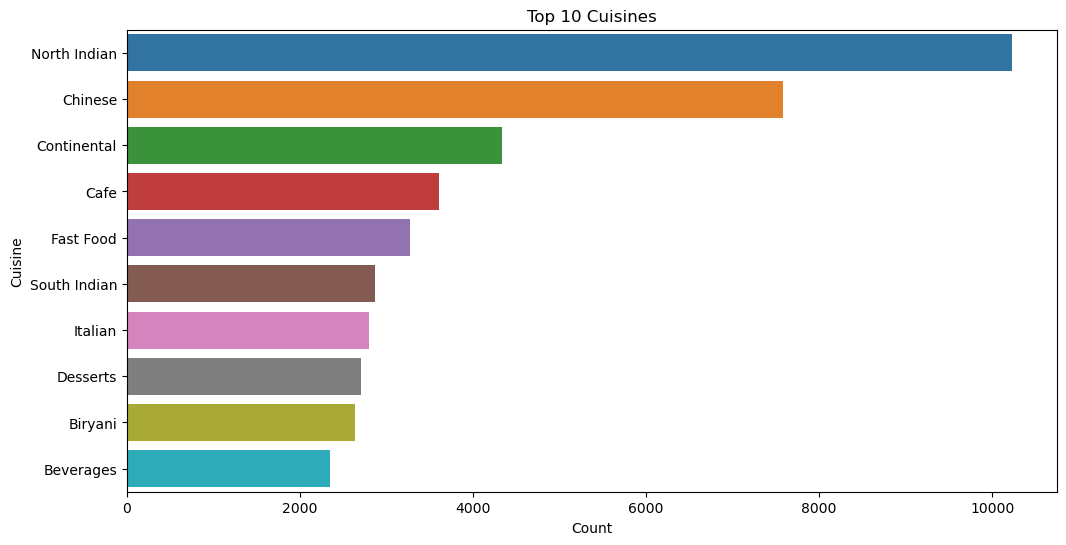

In [37]:
# Cuisines analysis
cuisines = df['cuisines'].str.split(', ').explode()
plt.figure(figsize=(12, 6))
sns.countplot(data=cuisines, y=cuisines, order=cuisines.value_counts().index[:10])
plt.title("Top 10 Cuisines")
plt.xlabel("Count")
plt.ylabel("Cuisine")
plt.show()

### Objective 9: Find most demanding meal time - Breakfast/Lunch/Dinner.# Note: order date and time field is missing in the dataset, so we need to retrieve from database. mealtime wise demand of online order preference checking will do later but we will analise it with the help of dishes.

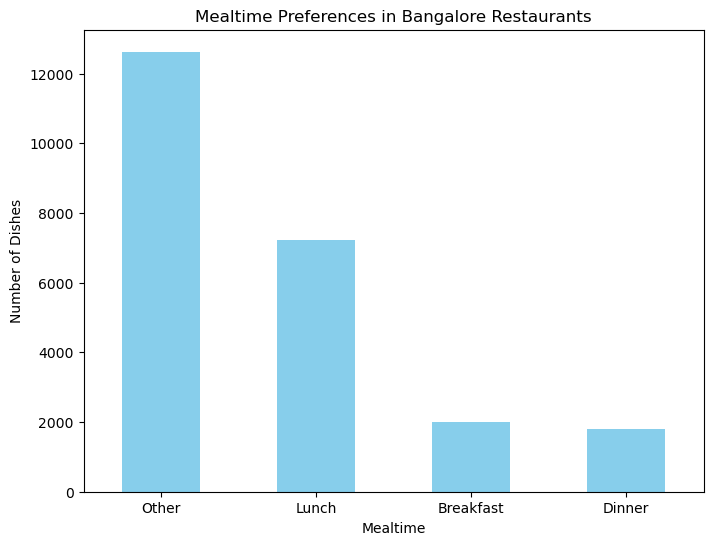

The most demanding mealtime is: Other


In [38]:
# Function to categorize dishes based on mealtime
def categorize_mealtime(dish):
    dish = dish.lower()
    if 'idli' in dish or 'dosa' in dish or 'vada' in dish or 'upma' in dish:
        return 'Breakfast'
    elif 'rice' in dish or 'biryani' in dish or 'curry' in dish or 'thali' in dish:
        return 'Lunch'
    elif 'roti' in dish or 'paratha' in dish or 'kebab' in dish or 'dal' in dish:
        return 'Dinner'
    else:
        return 'Other'

# Apply the categorize_mealtime function to categorize dishes
df['mealtime'] = df['dish_liked'].apply(categorize_mealtime)

# Count the number of dishes associated with each mealtime
mealtime_counts = df['mealtime'].value_counts()

# Create a bar plot to visualize mealtime preferences
plt.figure(figsize=(8, 6))
mealtime_counts.plot(kind='bar', color='skyblue')
plt.title("Mealtime Preferences in Bangalore Restaurants")
plt.xlabel("Mealtime")
plt.ylabel("Number of Dishes")
plt.xticks(rotation=0)
plt.show()

# Determine the most demanding mealtime
most_demanding_mealtime = mealtime_counts.idxmax()
print(f"The most demanding mealtime is: {most_demanding_mealtime}")


### Objective 10: Find the business growth of Zomato online food delivery business over the period. # Note: When we explored the dataset, the date field not available. so we have to fetch additional fields from database. Now let's check most revenue generating cities for zomato based on order counts. 

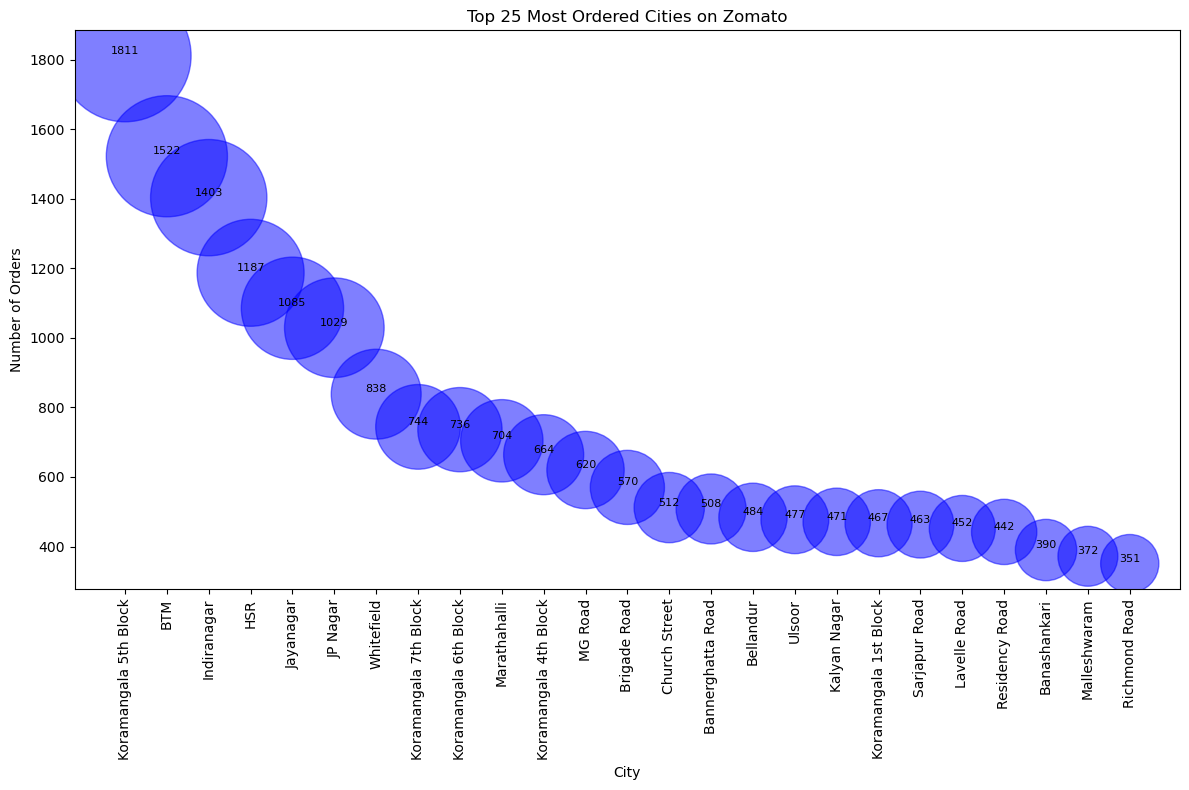

In [39]:
# Group the data by city and count the number of transactions (orders) in each city
city_orders = df['location'].value_counts().reset_index()

# Rename the columns for clarity
city_orders.columns = ['City', 'Number of Orders']

# Sort the data by the number of orders
city_orders = city_orders.sort_values(by='Number of Orders', ascending=False)

# Filter the top 25 cities or adjust the number as needed
top_25_cities = city_orders.head(25)

# Create the bubble chart
plt.figure(figsize=(12, 8))
plt.scatter(top_25_cities['City'], top_25_cities['Number of Orders'], s=top_25_cities['Number of Orders']*5, alpha=0.5, c='b')

# Add labels to the bubbles
for i, row in top_25_cities.iterrows():
    plt.text(row['City'], row['Number of Orders'], f"{row['Number of Orders']}", ha='center', va='bottom', fontsize=8)

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Set labels and title
plt.xlabel('City')
plt.ylabel('Number of Orders')
plt.title('Top 25 Most Ordered Cities on Zomato')

# Display the bubble chart
plt.tight_layout()
plt.show()


# Thanks for reading and reviewing this project. Have a nice day..!